## Observations and Insights 

In [169]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Pymaceuticals/Mouse_metadata.csv"
study_results_path = "Pymaceuticals/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)
mouse_metadata_df.head()

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
# Display the data table for preview
mouse_study_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID")
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in study data
mouse_study_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [6]:
# Checking the unique number of mice in study data
unique_mouse = mouse_study_df["Mouse ID"].value_counts()
unique_mouse.count()

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
dup_mice = mouse_study_df[mouse_study_df.duplicated(["Mouse ID", "Timepoint"], keep=False)]
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_mouse_study_df = mouse_study_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
new_mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
new_mouse_study_df.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

In [10]:
new_unique_mouse = new_mouse_study_df["Mouse ID"].value_counts()
new_unique_mouse.count()

249

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = new_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = new_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = new_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard = new_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = new_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_new_mouse_study_df = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Volume Variance": variance, "Tumore Volume Std. Dev.": standard, "Tumor Volume Std. Err.": sem})
summary_new_mouse_study_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumore Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
agg_chart = new_mouse_study_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
agg_chart                                                           

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Unique Mice Tested')

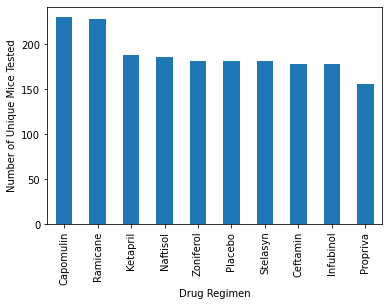

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
Drug = new_mouse_study_df.groupby("Drug Regimen")
Unique_Mouse = Drug["Mouse ID"].count()
Measurements_df = pd.DataFrame({"Number of Unique Mice Tested": Unique_Mouse})
Measurements_df.sort_values("Number of Unique Mice Tested", ascending = False, inplace = True)
#Measurements_df
Measurements_df.plot.bar(y="Number of Unique Mice Tested", legend = False)
plt.ylabel("Number of Unique Mice Tested")

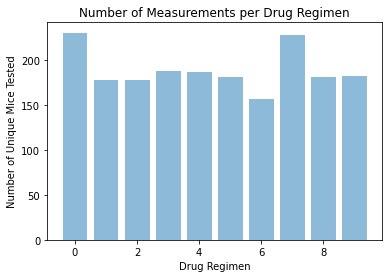

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
Drug = new_mouse_study_df.groupby("Drug Regimen")
Unique_Mouse = Drug["Mouse ID"].count()

x_axis = np.arange(len(Drug))

plt.bar(x_axis, Unique_Mouse, align = "center", alpha = 0.5)
plt.title("Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.show()


<AxesSubplot:ylabel='Sex'>

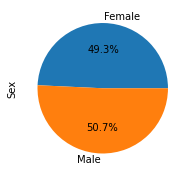

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Gender = new_mouse_study_df.groupby("Sex")
Gender_count = Gender["Drug Regimen"].count()
#Gender_count
Gender_df = pd.DataFrame({"Sex":Gender_count,})
Gender_df.plot.pie(y = "Sex", legend = False, figsize = (7, 3), autopct = '%1.1f%%')

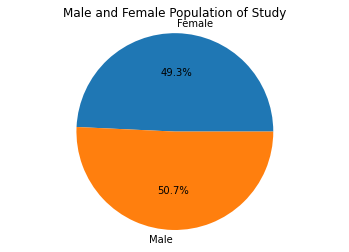

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Gender = new_mouse_study_df.groupby("Sex")
labels = ["Female", "Male"]
Gender_count = Drug["Drug Regimen"].count()
#Gender_count

plt.pie(Gender_count, labels = labels, autopct = '%1.1f%%')
plt.axis("equal")
plt.title("Male and Female Population of Study")
plt.show()


## Quartiles, Outliers and Boxplots

In [98]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
tumor_mouse_study_df = new_mouse_study_df.groupby("Mouse ID").max().reset_index()
#tumor_mouse_study_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_tumor_mouse_study =tumor_mouse_study_df[["Mouse ID","Timepoint"]].merge(new_mouse_study_df,on=["Mouse ID", "Timepoint"], how="left")
new_tumor_mouse_study

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [105]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumors = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for drugs in drugs:
    drug_tumors = new_tumor_mouse_study[new_tumor_mouse_study["Drug Regimen"] == drugs]["Tumor Volume (mm3)"]
    iqr = drug_tumors.quantile(.75) - drug_tumors.quantile(.25)
    lower_bound = drug_tumors.quantile(.25) - (1.5*iqr)
    upper_bound = drug_tumors.quantile(.75) + (1.5*iqr)

    tumors.append(drug_tumors)
    
# Determine outliers using upper and lower bounds
    print(f"The drug {drugs} Lower Bound {lower_bound} Upper Bound {upper_bound}: Potential Outliers: {drug_tumors[(drug_tumors<lower_bound)|(drug_tumors>upper_bound)]}")
            

The drug Capomulin Lower Bound 20.70456164999999 Upper Bound 51.83201549: Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
The drug Ramicane Lower Bound 17.912664470000003 Upper Bound 54.30681135: Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
The drug Infubinol Lower Bound 36.83290494999999 Upper Bound 82.74144559000001: Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
The drug Ceftamin Lower Bound 25.355449580000002 Upper Bound 87.66645829999999: Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


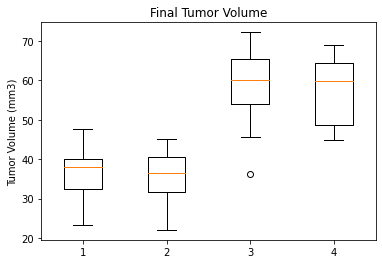

In [116]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume")
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumors)
plt.show()

## Line and Scatter Plots

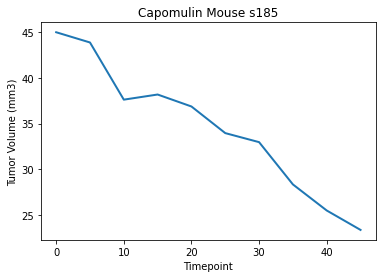

In [145]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = new_mouse_study_df.loc[new_mouse_study_df["Drug Regimen"] == "Capomulin",:]
#Capomulin_df.head()
Capomulin_line_df = new_mouse_study_df.loc[new_mouse_study_df["Mouse ID"] == "s185",:]
#Capomulin_line_df.head()
x_axis = Capomulin_line_df["Timepoint"]
vol = Capomulin_line_df["Tumor Volume (mm3)"]

plt.title("Capomulin Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis, vol, linewidth = 2)
plt.show()


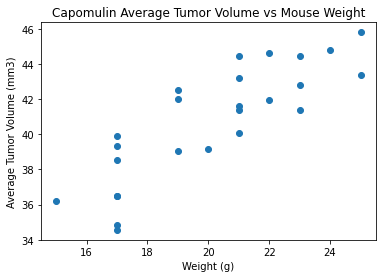

In [154]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_Capolmulin = Capomulin_df.groupby(["Mouse ID"]).mean()

plt.scatter(avg_Capolmulin["Weight (g)"],avg_Capolmulin["Tumor Volume (mm3)"])
plt.title("Capomulin Average Tumor Volume vs Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [155]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#Correlation:
corr=round(st.pearsonr(avg_Capolmulin["Weight (g)"],avg_Capolmulin["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [170]:
#linear regression model
avg_Capolmulin = Capomulin_df.groupby(["Mouse ID"]).mean()
x_values = avg_Capolmulin["Weight (g)"]
y_values = avg_Capolmulin['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.7088568047708717


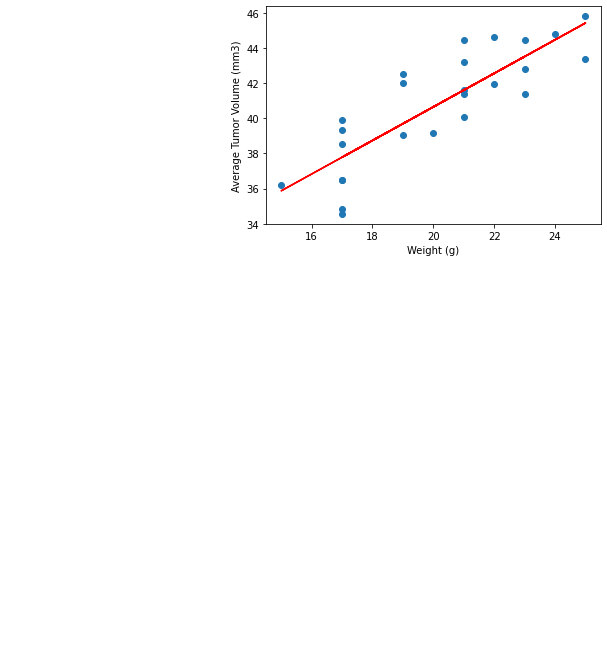

In [171]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue**2}")
plt.show()